<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Final-Project/blob/main/CHL5230_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis


*   Visualizations
*   Data Cleaning (Deal with N/A)




(10000, 43)
Index(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date',
       'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS',
       'FBS_Date', 'FBS>DM', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date',
       'Diabetes', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES'],
      dtype='object')


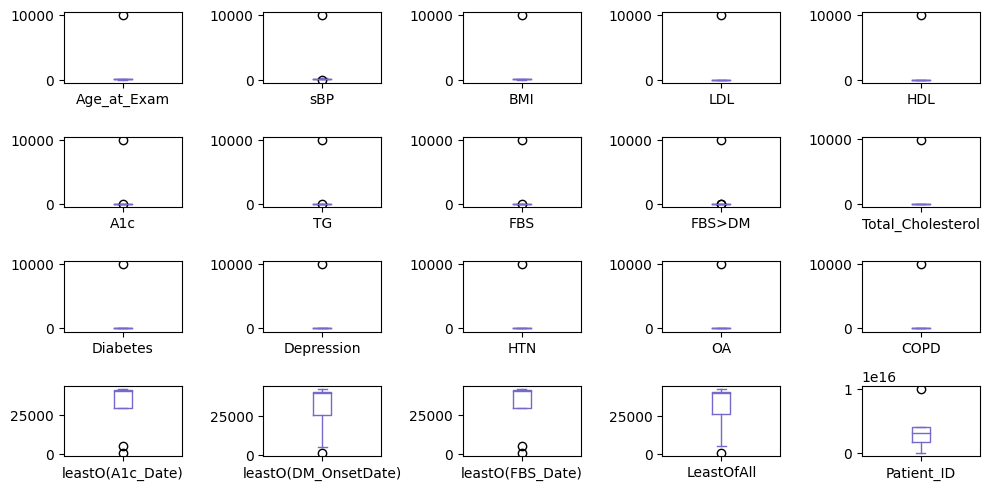

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

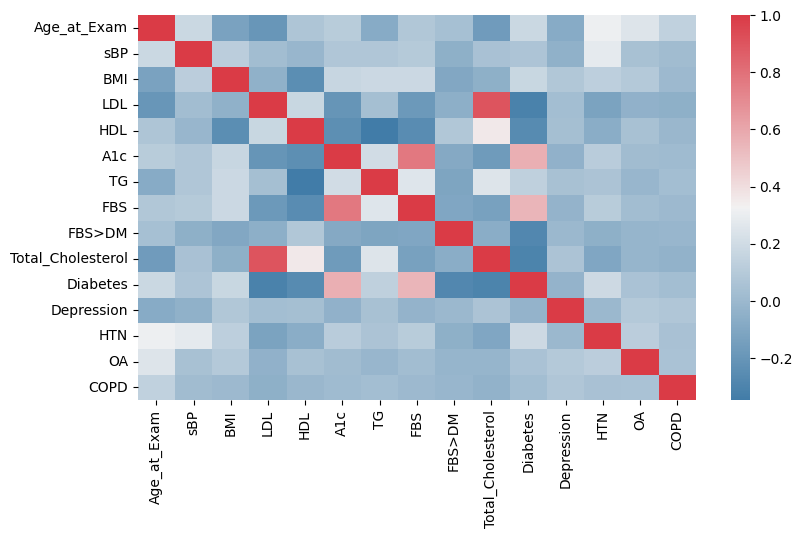

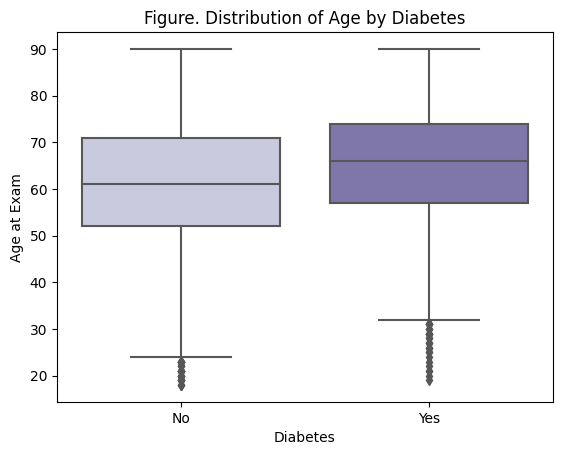

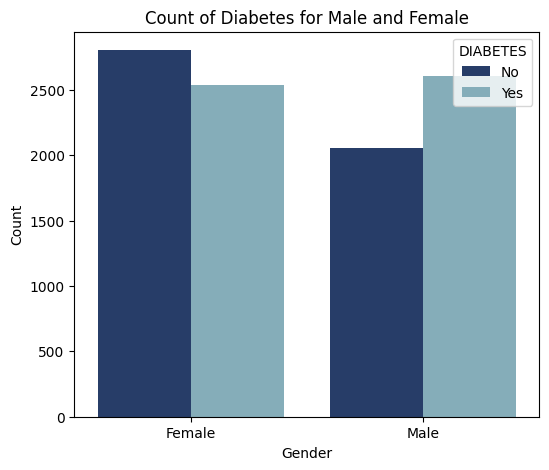

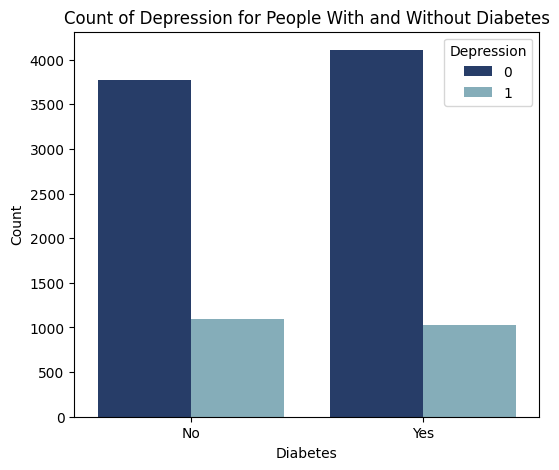

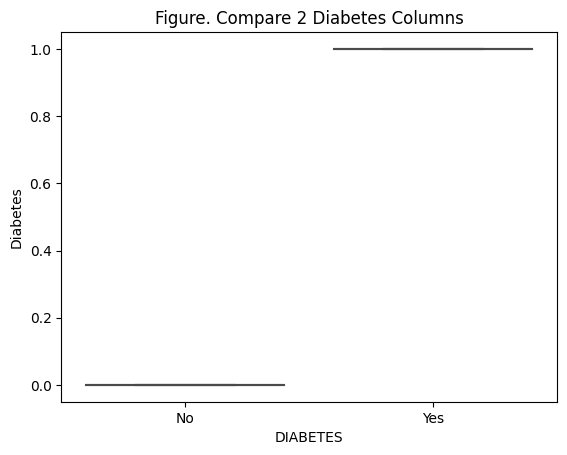

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,Sex
0,65,126.0,31.000000,1.66,1.11,5.4,2.28,5.8,1,3.81,0,0,0,0,0,1
1,62,135.0,25.846483,2.49,1.37,5.8,1.37,5.4,1,4.48,0,0,1,0,0,1
3,51,136.0,56.710775,2.80,1.94,6.0,0.99,6.0,1,5.19,0,0,0,0,0,1
4,40,123.0,33.067867,2.48,1.17,5.8,1.04,5.2,1,4.12,0,1,0,0,0,1
5,60,130.0,67.751227,2.20,1.38,6.1,0.76,5.4,1,3.93,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,78,145.0,32.440000,3.84,1.62,6.8,1.30,7.7,1,6.05,1,0,1,0,0,1
9996,54,156.0,29.690000,2.26,1.52,6.7,1.20,7.6,1,4.33,1,0,1,0,0,1
9997,62,130.0,31.460000,1.50,1.80,6.3,1.19,6.0,1,3.85,1,0,1,1,0,1
9998,59,110.0,25.060000,3.44,1.49,6.2,1.18,5.7,1,5.47,1,0,0,0,0,1


In [1]:
# CHL5230 final project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# read dataset
diabetes_df = pd.read_excel('Diabetes Study File 10K Dec 14 2017.xlsx')
diabetes_df.head()

# check dimension of the dataset
print(diabetes_df.shape)

# list the columns of the dataframe
print(diabetes_df.columns)

# summary statistics
description = diabetes_df.describe()
description
description.plot(kind='box', subplots=True, layout=(4, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# check missing value
# no NA
print(diabetes_df.isnull().sum())

# select variables
diabetes_selected = diabetes_df[['Age_at_Exam','sBP','BMI','LDL','HDL','A1c','TG','FBS','FBS>DM',
                                'Total_Cholesterol','Diabetes', 'Depression','HTN','OA','COPD',
                                'Hypertension_Medications','Corticosteroids','Sex','A1C_BEF_DM',
                                'FBS_BEF_DM','DIABETES']]

# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (diabetes_selected.isnull().sum(axis=1) > 0).sum() / len(diabetes_selected)
percentage_missing_rows

# exploration
diabetes_selected['COPD'].unique()
diabetes_selected['Hypertension_Medications'].unique()


########################################################### visualization

plt.figure(figsize=(9,5))

# correlation matrix between variables
Mcorr = diabetes_selected.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

# age
sns.boxplot( x=diabetes_df['DIABETES'], y=diabetes_selected['Age_at_Exam'], palette="Purples")
plt.title('Figure. Distribution of Age by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age at Exam')
plt.show()

# gender
# grouped bar chart using seaborn's countplot function
plt.figure(figsize=(6, 5))
sns.countplot(data=diabetes_df, x='Sex', hue='DIABETES', palette=['#1c3a73', '#7cb1c2'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Diabetes for Male and Female')
plt.legend(title='DIABETES')
plt.show()

# depression
# grouped bar chart
plt.figure(figsize=(6, 5))
sns.countplot(data=diabetes_df, x='DIABETES', hue='Depression', palette=['#1c3a73', '#7cb1c2'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Depression for People With and Without Diabetes')
plt.legend(title='Depression')
plt.show()

# compare 2 Diabetes columns
sns.boxplot( x=diabetes_df['DIABETES'], y=diabetes_df['Diabetes'], palette="Blues")
plt.title('Figure. Compare 2 Diabetes Columns')
plt.show()
# Diabetes is the numerically coded version of DIABETES

# distribution of the class diabetes
import plotly.express as px
counts = diabetes_df['Diabetes'].value_counts()
# Define color sequence
colors = ['#1c3a73', '#7cb1c2']
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in Diabetes Column',
    color_discrete_sequence=colors  # apply colors
)
fig.show()

########################################################## clean dataset
# transform Sex column
diabetes_selected['Sex'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

# drop DIABETES column as it's a duplicate with Diabetes column (shown in visualization)
diabetes_selected.drop('DIABETES', axis=1, inplace=True)

# dealing with Missing Value
# drop columns Hypertension_Medications, Corticosteroids, A1C_BEF_DM, FBS_BEF_DM due to too much N/A
diabetes_selected.drop('Hypertension_Medications', axis=1, inplace=True)
diabetes_selected.drop('Corticosteroids', axis=1, inplace=True)
diabetes_selected.drop('A1C_BEF_DM', axis=1, inplace=True)
diabetes_selected.drop('FBS_BEF_DM', axis=1, inplace=True)

# drop rows contain N/A in any of the left 16 columns
diabetes_selected.dropna()
# cleaned dataset dimension: 9644*16

########################################################## logistic regression



